In [ ]:
https://www.kaggle.com/vikramtiwari/autoencoders-using-tf-keras-mnist

In [ ]:
Implementations::
        a simple autoencoder based on a fully connected layer
        a sparse autoencoder
        a deep fully-connected autoencoder
        a deep convolutional autoencoder
        an image denoising model
        a sequence-to-sequence autoencoder
        a variational autoenoder

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
def load_data(path):
    with np.load(path) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
        return (x_train, y_train), (x_test, y_test)

In [4]:
#Implementing SImple fully onnected autoencoder
# this is the siez of our encoded representations
ENCODING_DIM = 32

# input placeholder
input_img = tf.keras.layers.Input(shape=(784,))

# this is the encoded representation of the input
encoded = tf.keras.layers.Dense(ENCODING_DIM, activation='relu')(input_img)

# this is the loss reconstruction of the input
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its recommendation
autoencoder = tf.keras.models.Model(input_img, decoded)

In [5]:
#Encoding function
encoder = tf.keras.models.Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = tf.keras.layers.Input(shape=(ENCODING_DIM,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = tf.keras.models.Model(encoded_input, decoder_layer(encoded_input))

In [6]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [15]:
(x_train, y_train), (x_test, y_test) = load_data('mnist.npz')

In [9]:
#Preprocessing Validations & Testings::
x_train.dtype

dtype('uint8')

In [10]:
x_train.shape

(60000, 28, 28)

In [12]:
x_train = x_train.astype('float32')
x_train.shape

(60000, 28, 28)

In [13]:
x_train.dtype

dtype('float32')

In [16]:
y_train.shape

(60000,)

In [17]:
x_test.shape

(10000, 28, 28)

In [18]:
x_test.dtype

dtype('uint8')

In [23]:
x_test = x_test.astype('float32')
print(x_test.dtype)
print(x_test.shape)

float32
(10000, 28, 28)


In [25]:
x_train = x_train/255
x_test = x_test/255

In [27]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [28]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 80us/sample - loss: 0.6931 - val_loss: 0.6944
Epoch 2/50
60000/60000 [==============================] - 3s 48us/sample - loss: 0.6930 - val_loss: 0.6943
Epoch 3/50
60000/60000 [==============================] - 3s 57us/sample - loss: 0.6930 - val_loss: 0.6943
Epoch 4/50
60000/60000 [==============================] - 3s 48us/sample - loss: 0.6929 - val_loss: 0.6942
Epoch 5/50
60000/60000 [==============================] - 2s 40us/sample - loss: 0.6928 - val_loss: 0.6941
Epoch 6/50
60000/60000 [==============================] - 3s 48us/sample - loss: 0.6927 - val_loss: 0.6941
Epoch 7/50
60000/60000 [==============================] - 3s 43us/sample - loss: 0.6926 - val_loss: 0.6940
Epoch 8/50
60000/60000 [==============================] - 2s 41us/sample - loss: 0.6926 - val_loss: 0.6940
Epoch 9/50
60000/60000 [==============================] - 2s 40us/sample - loss: 0.6925 - val_

In [29]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

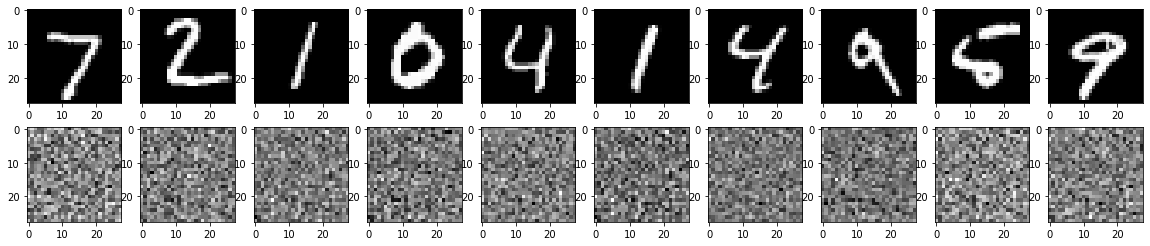

In [34]:
n = 10 # how many images we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()

plt.show()

In [31]:
plt.show()

In [35]:
#Here will add activity regularizer  ==> for sparsity constraints on encoded representations
ENCODING_DIM = 32

input_img = tf.keras.layers.Input(shape=(784,))

# add a dense layer with L1 activity regularizer
encoded = tf.keras.layers.Dense(ENCODING_DIM, activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-5))(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# now let's train this for 100 epochs (with added regularization, the model is less likely to overfit and can be trained longer). The model ends with a train loss of 0.11 and test loss of 0.10. The difference is mostly due to the regularization term being added to the loss during training
autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 69us/sample - loss: 0.6931 - val_loss: 0.6936
Epoch 2/100
60000/60000 [==============================] - 3s 50us/sample - loss: 0.6930 - val_loss: 0.6936
Epoch 3/100
60000/60000 [==============================] - 4s 68us/sample - loss: 0.6930 - val_loss: 0.6935
Epoch 4/100
60000/60000 [==============================] - 3s 49us/sample - loss: 0.6929 - val_loss: 0.6934
Epoch 5/100
60000/60000 [==============================] - 3s 57us/sample - loss: 0.6928 - val_loss: 0.6934
Epoch 6/100
60000/60000 [==============================] - 3s 57us/sample - loss: 0.6927 - val_loss: 0.6933
Epoch 7/100
60000/60000 [==============================] - 3s 53us/sample - loss: 0.6926 - val_loss: 0.6933
Epoch 8/100
60000/60000 [==============================] - 3s 51us/sample - loss: 0.6926 - val_loss: 0.6932
Epoch 9/100
60000/60000 [==============================] - 4s 59us/sample - loss: 0.69

Epoch 76/100
60000/60000 [==============================] - 3s 56us/sample - loss: 0.6872 - val_loss: 0.6892
Epoch 77/100
60000/60000 [==============================] - 3s 44us/sample - loss: 0.6871 - val_loss: 0.6892
Epoch 78/100
60000/60000 [==============================] - 3s 45us/sample - loss: 0.6870 - val_loss: 0.6891
Epoch 79/100
60000/60000 [==============================] - 3s 48us/sample - loss: 0.6869 - val_loss: 0.6890
Epoch 80/100
60000/60000 [==============================] - 3s 44us/sample - loss: 0.6869 - val_loss: 0.6890
Epoch 81/100
60000/60000 [==============================] - 3s 45us/sample - loss: 0.6868 - val_loss: 0.6889
Epoch 82/100
60000/60000 [==============================] - 3s 49us/sample - loss: 0.6867 - val_loss: 0.6889
Epoch 83/100
60000/60000 [==============================] - 3s 45us/sample - loss: 0.6866 - val_loss: 0.6888
Epoch 84/100
60000/60000 [==============================] - 3s 50us/sample - loss: 0.6865 - val_loss: 0.6887
Epoch 85/100
60000/

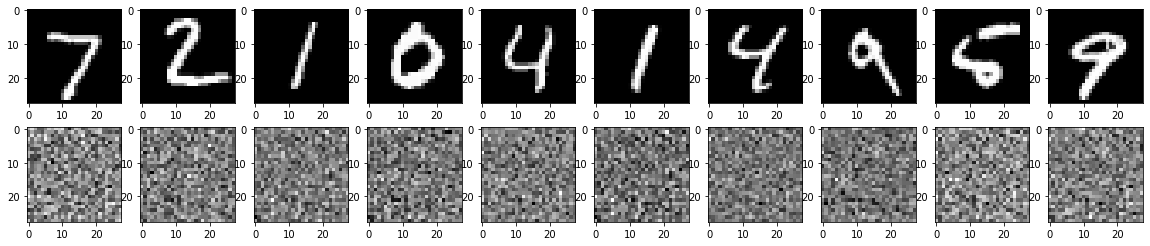

In [36]:
n = 10 # how many images we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()

plt.show()

In [37]:
#Deep Autoencoder implementations
input_img = tf.keras.layers.Input(shape=(784,))
encoded = tf.keras.layers.Dense(128, activation='relu')(input_img)
encoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
encoded = tf.keras.layers.Dense(32, activation='relu')(encoded)

decoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(128, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(decoded)
autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 96us/sample - loss: 0.6931 - val_loss: 0.6929
Epoch 2/100
60000/60000 [==============================] - 4s 69us/sample - loss: 0.6930 - val_loss: 0.6928
Epoch 3/100
60000/60000 [==============================] - 4s 71us/sample - loss: 0.6929 - val_loss: 0.6927
Epoch 4/100
60000/60000 [==============================] - 5s 91us/sample - loss: 0.6928 - val_loss: 0.6927
Epoch 5/100
60000/60000 [==============================] - 4s 73us/sample - loss: 0.6927 - val_loss: 0.6926
Epoch 6/100
60000/60000 [==============================] - 6s 92us/sample - loss: 0.6927 - val_loss: 0.6926
Epoch 7/100
60000/60000 [==============================] - 5s 85us/sample - loss: 0.6926 - val_loss: 0.6925
Epoch 8/100
60000/60000 [==============================] - 5s 78us/sample - loss: 0.6925 - val_loss: 0.6924
Epoch 9/100
60000/60000 [==============================] - 3s 56us/sample - loss: 0.69

Epoch 76/100
60000/60000 [==============================] - 4s 59us/sample - loss: 0.6862 - val_loss: 0.6878
Epoch 77/100
60000/60000 [==============================] - 3s 58us/sample - loss: 0.6861 - val_loss: 0.6877
Epoch 78/100
60000/60000 [==============================] - 3s 58us/sample - loss: 0.6860 - val_loss: 0.6877
Epoch 79/100
60000/60000 [==============================] - 4s 58us/sample - loss: 0.6859 - val_loss: 0.6876
Epoch 80/100
60000/60000 [==============================] - 4s 58us/sample - loss: 0.6858 - val_loss: 0.6875
Epoch 81/100
60000/60000 [==============================] - 5s 77us/sample - loss: 0.6857 - val_loss: 0.6875
Epoch 82/100
60000/60000 [==============================] - 4s 69us/sample - loss: 0.6856 - val_loss: 0.6874
Epoch 83/100
60000/60000 [==============================] - 4s 65us/sample - loss: 0.6855 - val_loss: 0.6873
Epoch 84/100
60000/60000 [==============================] - 4s 65us/sample - loss: 0.6854 - val_loss: 0.6872
Epoch 85/100
60000/

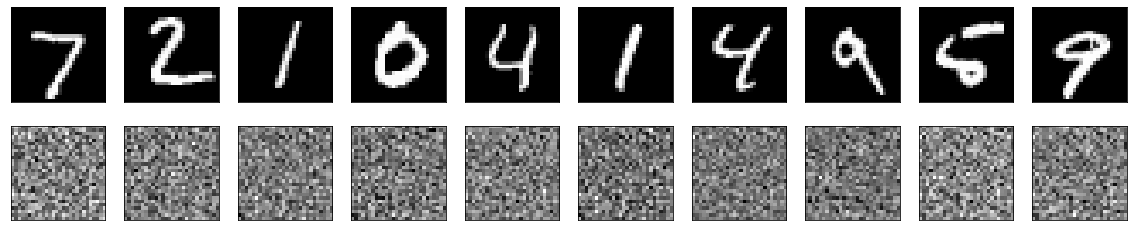

In [38]:
n = 10 # how many images we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [39]:
#Implementing COnvolutional autoencoder..!
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [41]:
(x_train, _), (x_test, _) = load_data('mnist.npz')

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [42]:
#Using callbacks here..!
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, shuffle=True, validation_data=(x_test, x_test), callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 126s 2ms/sample - loss: 0.6947 - val_loss: 0.6938
Epoch 2/50
60000/60000 [==============================] - 136s 2ms/sample - loss: 0.6928 - val_loss: 0.6917
Epoch 3/50
60000/60000 [==============================] - 138s 2ms/sample - loss: 0.6905 - val_loss: 0.6893
Epoch 4/50
60000/60000 [==============================] - 136s 2ms/sample - loss: 0.6877 - val_loss: 0.6861
Epoch 5/50
60000/60000 [==============================] - 155s 3ms/sample - loss: 0.6838 - val_loss: 0.6813
Epoch 6/50
60000/60000 [==============================] - 150s 2ms/sample - loss: 0.6775 - val_loss: 0.6727
Epoch 7/50
60000/60000 [==============================] - 138s 2ms/sample - loss: 0.6638 - val_loss: 0.6517
Epoch 8/50
60000/60000 [==============================] - 141s 2ms/sample - loss: 0.6259 - val_loss: 0.5888
Epoch 9/50
60000/60000 [==============================] - 155s 3ms/sample - loss: 0.52

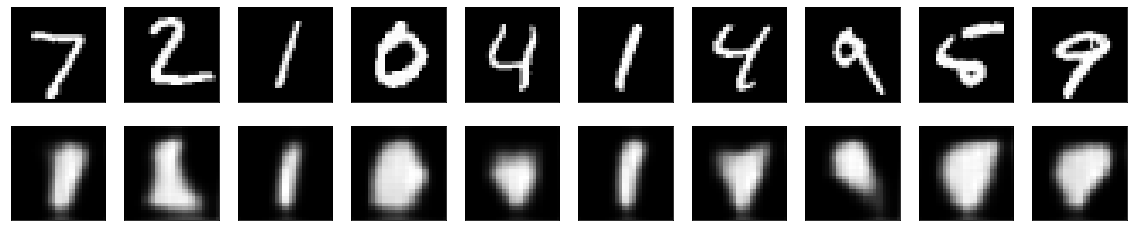

In [43]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()